08.09 - Matplot scatter was showing that the data cannot be classified with the given parameters. So if the graph cannot give a graph pattern idea, the problem cannot be solved with linear methods. 


06.09 The function got minimized, but the prediction is not working correctly. I have to check whether it has to do with the data I picked up for training. 


10/09 The model is working correctly (optimized thetas are same). The examplar model worked at 19.5 s, so my one is way more efficient. Most probably because of bad refactoring.Have to understand, how the exemplar graph is being built

In [1]:
#Class
%matplotlib inline
%precision 2
import numpy as np
import matplotlib.pyplot as plt


class FlowerClassificator():
    
    def __init__(self, alpha = 0.3, num_iter = 100000, fit_ones=True, reg_ld = 0.1):
        self.alpha = alpha
        self.num_iter = num_iter
        self.fit_ones = fit_ones
        self.reg_ld = reg_ld

        
    def data_prep(self, X):
        
        return np.concatenate((np.ones((X.shape[0],1)), X), axis=1)

    def sigmoid(self, z):
        g = 1 /(1+ np.exp(-z))
        return g

    def CostFunction(self, h, y):
        reg_factor = (self.reg_ld/2) * self.theta**2
        J = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()+np.sum(reg_factor/y.size)
        return J
    def CalcGradient(self,X,h,y):
        derivative_reg = self.reg_ld*self.theta/y.size
        grad = np.dot(X.T, (h-y))/y.size + derivative_reg.T
        grad[0] -= derivative_reg[0]
        return grad
                      
    def optimize(self, X, y):
        X = self.data_prep(X)
        self.theta = np.zeros(X.shape[1], dtype=np.float32)
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        print("Initial Cost is", self.CostFunction(self.sigmoid(np.dot(X, self.theta)),y))
        
        
        for i in range(self.num_iter):
            
            self.theta -= self.alpha*self.CalcGradient(X,h,y)
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            #print(self.RegCostFunction(h,y))
            
            
        print("Minimized Cost is", self.CostFunction(h,y))
        print("Optimized theta:", self.theta)
        
        
    def predict_prep(self, X):
        if self.fit_ones:
                X = self.data_prep(X)
        return X
    def predict(self, X):
        return self.sigmoid(np.dot(self.predict_prep(X), self.theta)).round()
    
    def Precision(self,X):
        preds = self.predict(X)
        print('Accuracy level: ', ((preds==y).mean())*100)
        
    def visualizedata(self, X,y):
            plt.figure(figsize=(20, 10))
            plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
            plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
            plt.legend()
            x1_min, x1_max = X[:,0].min(), X[:,0].max(),
            x2_min, x2_max = X[:,1].min(), X[:,1].max(),
            xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))#create the matrix grid of values (necessary for plt.contour)
            grid = np.c_[xx1.ravel(), xx2.ravel()]
            probs = self.predict(grid).reshape(xx1.shape)
            plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');#create the graph/any better approaches?
            
    
                      

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs
Initial Cost is 0.6931471805599454
Minimized Cost is 0.12754571685269236
Optimized theta: [-14.68   6.45  -6.41]
Accuracy level:  100.0


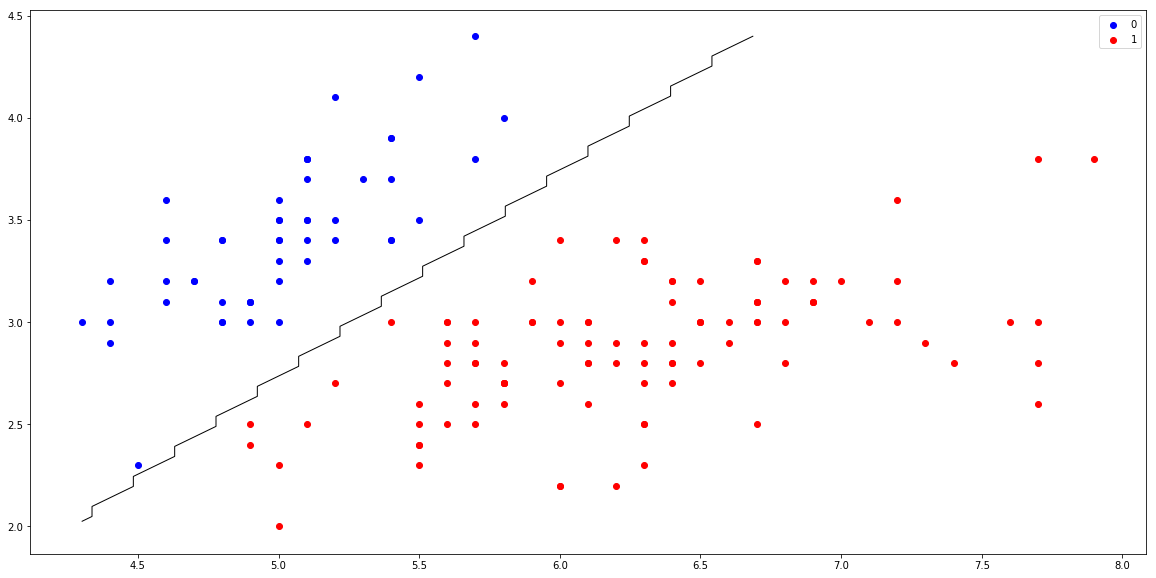

In [4]:
#import data for training

%time

from sklearn import datasets

iris = datasets.load_iris()

X = np.array(iris.data[:, :2], dtype = np.float32)
y = np.array((iris.target != 0) * 1, dtype = np.float32)

model = FlowerClassificator(alpha=0.3, num_iter=100000, reg_ld=0.1)


model.optimize(X,y)
model.Precision(X)
model.visualizedata(X,y)

11/09 The model is working correctly. The wall time does not overcome 30 ms basically works as good as sklearn logistic regression